# Locating a Point

## Problem Formulation:

The given problem can be restated as follows: 

> Locate a point given on a plane by recursively zeroing in on the quadrant in which it is present.

## Proposed Solution Methodology:

We will first choose a rectangular region $R\in{\rm I\!R}^2$ and a point lying in $R$.

We will create an object to focus on this rectangular region, and divide it into four quadrants. Next, we will find which quadrant our point lies in. Then, we will focus on that quadrant as our new plane, and repeat the same process again.

For this purpose, I've created my own Python class (called Plane), which takes care of the plane's position in real space, is able to find which quadrant a given point lies in, and is able to return its bounding box's coordinates as a list of points, making it easier for us to draw the boxes using SageMath's `polygon` function when the required quadrant is found.

## Implementation:

We will do this assignment in Python using SageMath, as SageMath provides us with a good graphing toolkit, which can easily plot polygons.

First, we will import the Plane class from Plane.py, located in this directory. (Please make sure it is present in this directory when checking whether this code is working.)

The syntax for that is:

In [1]:
from Plane import Plane

Now, we're defining the overall plane's boundaries in real space (basically our $r\in{\rm I\!R}^2$).

I've chosen a square region [0,10] on both axes.

In [2]:
xs = [0,10]
ys = [0,10]

Creating the Plane object using the constructor method which takes in 2 lists as inputs, one with the x-range and the other with the y-range.

Then we're printing it's bounding box's values, just to ensure that it initialized properly.

In [3]:
plane = Plane(xs,ys)
print(plane.boundingBox())

[[0, 0], [0, 10], [10, 10], [10, 0]]


Now, we're plotting our sample space, before we start locating the point accurately.

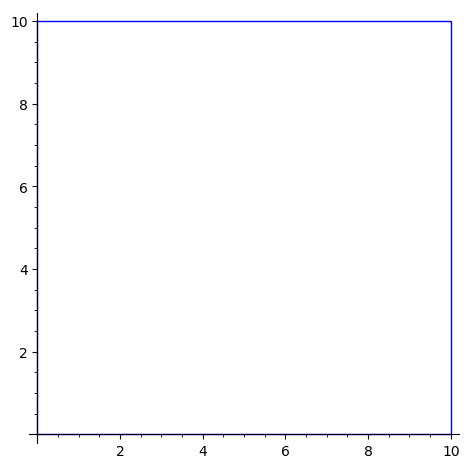

In [4]:
p = []
p.append(polygon(plane.boundingBox(),fill=False))
sum(p).show()

I've randomly chosen the point to be `[3,4]`, but it could indeed be anything within the range of the plane.

(Note that if you do put in a point outside this plane region, you'll get a `NoneType` object, which will stop the code from executing. So, the exceptions are handled in some way.)

In [5]:
my_point = [3,4]

Now, we will zero in on our point, recursively, 6 times. Change the `depth` from 6 to a larger value to make it zero in more closely.

The plot below shows the point in red, and all the quadrants found at each stage in blue.

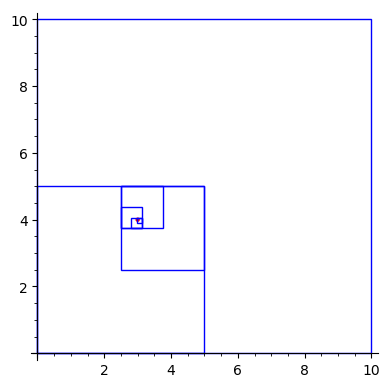

In [6]:
depth = 6
for i in range(depth):
    plane = plane.whichQuadrant(my_point)
    p.append(polygon(plane.boundingBox(),fill=False))
p.append(point(my_point,color='red'))
sum(p).show()

## Documentation:

### Plane.py
The soure code for the Plane class from Plane.py is given below, along with the Python docstring. These can also be accessed using the help commands in the IPython terminal.


```python
class Plane:
    """
    A simple class which can be used to represent general rectangular planes
    
    It contains:
    1. A method to initialize its bounds and its quadrants
    2. A method to find in which of its quadrants a given point lies, and it returns a new object of the same type which represents that quadrant of the plane
    3. A method to return the string representation of its bounds
    4. A method to return the bounds as a list of points (here, points are 1x2 lists)
    """

    def __init__(self, lstx, lsty):
        """
        Initialize the x_min, x_max, y_min, y_max, calculate x_mid and y_mid to make it easier to calculate the quadrants bounds
        """
        self.x_min = lstx[0]
        self.x_max = lstx[1]
        self.y_min = lsty[0]
        self.y_max = lsty[1]
        self.x_mid = (self.x_min+self.x_max)/2
        self.y_mid = (self.y_min+self.y_max)/2
        self.q1 = [[self.x_min,self.x_mid],[self.y_min,self.y_mid]]
        self.q2 = [[self.x_mid,self.x_max],[self.y_min,self.y_mid]]
        self.q3 = [[self.x_mid,self.x_max],[self.y_mid,self.y_max]]
        self.q4 = [[self.x_min,self.x_mid],[self.y_mid,self.y_max]]
    def whichQuadrant(self, point):
        """
        Find which quadrant a given point lies in and return the Plane object representing that
        """
        x = point[0]
        y = point[1]
        if x>=self.x_min and x<self.x_mid:
            if y>=self.y_min and y<self.y_mid:
                return Plane(self.q1[0],self.q1[1])
            elif y>=self.y_mid and y<self.y_max:
                return Plane(self.q4[0],self.q4[1])
        elif x>=self.x_mid and x<self.x_max:
            if y>=self.y_min and y<self.y_mid:
                return Plane(self.q2[0],self.q2[1])
            elif y>=self.y_mid and y<self.y_max:
                return Plane(self.q3[0],self.q3[1])
        else:
            return None
    def __str__(self):
        """
        Return the string representation of the Plane object as the bounding values
        """
        return "x_min = "+str(self.x_min)+", x_max = "+str(self.x_max)+"\ny_min = "+str(self.y_min)+", y_max = "+str(self.y_max)
    def boundingBox(self):
        """
        Return the bounding box of the plane as a list of points, where points are 1x2 lists
        """
        return [[self.x_min,self.y_min],[self.x_min,self.y_max],[self.x_max,self.y_max],[self.x_max,self.y_min]]
```
(It is only kept here for showing the source code within the Jupyter notebook, and cannot be executed, as it has been merely written here in Markdown.)

### SageMath functions used:

1. `polygon(xdata,ydata,options)`
    
    Basically, `polygon` draws a polygon by joining the points given in xdata and ydata

2. `point(xdata,ydata,options)`

    Basically, `point` draws points at the given xdata and ydata

3. `show()`

    `show()` is called on a plot object to display it

### Pure Python functions used:

1. `print(args)`

    This prints out the string `args` to the console. In case of an object, it prints out `str(args)` instead.
2. `list.append(element)`

    This adds the element `element` to the list `list`.
3. `sum(list)`

    This adds the elements of the list `list`. This only works if adding the elements of `list` is a valid Python operation, i.e. if the \_\_add\_\_ function has been overloaded properly.
    
4. `range(n)`

    This creates a range of numbers from 0 to n-1, which we can iterate over.